In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)


labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def evaluate(final_data):
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        logisticRegr = LogisticRegression()
        logisticRegr.fit(x_train,y_train)
        predictions = logisticRegr.predict(x_test)
        accuracy = (sum([1 if y_test[i]==predictions[i] else 0 for i in range(y_test.shape[0])])/y_test.shape[0])*100
        print("\nAccuracy using sklearn: {:.2f}%\n".format(accuracy))
        from sklearn.metrics import classification_report
        print(classification_report(y_test,predictions))
        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)

## Mean

In [4]:
# Mean
evaluate(final_data1)


Accuracy using sklearn: 92.11%

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94        75
         1.0       0.89      0.87      0.88        39

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Confusion matrix:
 [[71  4]
 [ 5 34]]

Accuracy using sklearn: 91.23%

              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93        69
         1.0       0.93      0.84      0.88        45

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion matrix:
 [[66  3]
 [ 7 38]]

Accuracy using sklearn: 91.23%

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        69
         1.0       0.89      0.89      0.89        45

    acc

In [5]:
data1 = np.array([[92.11,91.23,91.23,88.60,86.84,92.11],
                 [0.91, 0.92, 0.91, 0.87, 0.86, 0.92],
                 [0.91, 0.90, 0.91, 0.88, 0.86, 0.91],
                 [0.91, 0.91, 0.91, 0.87, 0.86, 0.91 ]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,92.11,91.23,91.23,88.60,86.84,92.11
Pricision,0.91,0.92,0.91,0.87,0.86,0.92
Recall,0.91,0.90,0.91,0.88,0.86,0.91
F1 Score,0.91,0.91,0.91,0.87,0.86,0.91


## Standard Error

In [6]:
# Standard Error
evaluate(final_data2)


Accuracy using sklearn: 89.47%

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92        75
         1.0       0.94      0.74      0.83        39

    accuracy                           0.89       114
   macro avg       0.91      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114

Confusion matrix:
 [[73  2]
 [10 29]]

Accuracy using sklearn: 89.47%

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92        69
         1.0       0.95      0.78      0.85        45

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.89       114
weighted avg       0.90      0.89      0.89       114

Confusion matrix:
 [[67  2]
 [10 35]]

Accuracy using sklearn: 87.72%

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90        69
         1.0       0.92      0.76      0.83        45

    acc

In [7]:
data1 = np.array([[89.47, 89.47, 87.72, 86.84, 86.84, 89.47],
                 [0.91, 0.91, 0.89, 0.86, 0.88, 0.91],
                 [0.86, 0.87, 0.86, 0.84, 0.85, 0.87],
                 [0.88, 0.89, 0.87, 0.85, 0.86, 0.89]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,89.47,89.47,87.72,86.84,86.84,89.47
Pricision,0.91,0.91,0.89,0.86,0.88,0.91
Recall,0.86,0.87,0.86,0.84,0.85,0.87
F1 Score,0.88,0.89,0.87,0.85,0.86,0.89


## Maximum

In [8]:
# Maximum
evaluate(final_data3)


Accuracy using sklearn: 97.37%

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[74  1]
 [ 2 37]]

Accuracy using sklearn: 95.61%

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        69
         1.0       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[68  1]
 [ 4 41]]

Accuracy using sklearn: 93.86%

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        69
         1.0       0.90      0.96      0.92        45

    acc

In [9]:
data1 = np.array([[97.37, 95.61, 93.86, 94.74, 94.74, 97.37],
                 [0.97, 0.96, 0.93, 0.95, 0.95, 0.97],
                 [0.97, 0.95, 0.94, 0.94, 0.95, 0.97],
                 [0.97, 0.95, 0.94, 0.94, 0.95, 0.97]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,97.37,95.61,93.86,94.74,94.74,97.37
Pricision,0.97,0.96,0.93,0.95,0.95,0.97
Recall,0.97,0.95,0.94,0.94,0.95,0.97
F1 Score,0.97,0.95,0.94,0.94,0.95,0.97


## Mean and Standard Error

In [10]:
# Mean and Standard Error
evaluate(final_data4)


Accuracy using sklearn: 95.61%

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        75
         1.0       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[73  2]
 [ 3 36]]

Accuracy using sklearn: 91.23%

              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93        69
         1.0       0.97      0.80      0.88        45

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114

Confusion matrix:
 [[68  1]
 [ 9 36]]

Accuracy using sklearn: 92.11%

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94        69
         1.0       0.95      0.84      0.89        45

    acc

In [11]:
data1 = np.array([[95.61, 91.23, 92.11, 89.47, 91.23, 95.61],
                 [0.95, 0.93, 0.93, 0.88, 0.91, 0.95],
                 [0.95, 0.89, 0.91, 0.89, 0.91, 0.95],
                 [0.95, 0.90, 0.92, 0.88, 0.91, 0.95]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,95.61,91.23,92.11,89.47,91.23,95.61
Pricision,0.95,0.93,0.93,0.88,0.91,0.95
Recall,0.95,0.89,0.91,0.89,0.91,0.95
F1 Score,0.95,0.90,0.92,0.88,0.91,0.95


## Standard Error and Maximum

In [12]:
# Standard Error and Maximum
evaluate(final_data5)


Accuracy using sklearn: 96.49%

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        75
         1.0       0.97      0.92      0.95        39

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion matrix:
 [[74  1]
 [ 3 36]]

Accuracy using sklearn: 95.61%

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        69
         1.0       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[68  1]
 [ 4 41]]

Accuracy using sklearn: 92.11%

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93        69
         1.0       0.89      0.91      0.90        45

    acc

In [13]:
data1 = np.array([[96.49, 95.61, 92.11, 95.61, 95.61, 96.49],
                 [0.97, 0.96, 0.92, 0.95, 0.96, 0.97],
                 [0.95, 0.95, 0.92, 0.95, 0.95, 0.95],
                 [0.96, 0.95, 0.92, 0.95, 0.95, 0.96]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,96.49,95.61,92.11,95.61,95.61,96.49
Pricision,0.97,0.96,0.92,0.95,0.96,0.97
Recall,0.95,0.95,0.92,0.95,0.95,0.95
F1 Score,0.96,0.95,0.92,0.95,0.95,0.96


## Mean and Maximum

In [14]:
# Mean and Maximum
evaluate(final_data6)


Accuracy using sklearn: 97.37%

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        75
         1.0       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion matrix:
 [[74  1]
 [ 2 37]]

Accuracy using sklearn: 95.61%

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96        69
         1.0       0.95      0.93      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[67  2]
 [ 3 42]]

Accuracy using sklearn: 91.23%

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        69
         1.0       0.86      0.93      0.89        45

    acc

In [15]:
data1 = np.array([[97.37, 95.61, 91.23, 95.61, 94.74, 97.37],
                 [0.97, 0.96, 0.91, 0.95, 0.95, 0.97],
                 [0.97, 0.95, 0.92, 0.95, 0.95, 0.97],
                 [0.97, 0.95, 0.91, 0.95, 0.95, 0.97]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,97.37,95.61,91.23,95.61,94.74,97.37
Pricision,0.97,0.96,0.91,0.95,0.95,0.97
Recall,0.97,0.95,0.92,0.95,0.95,0.97
F1 Score,0.97,0.95,0.91,0.95,0.95,0.97


## Mean, Standard Error and Maximum

In [16]:
# Mean, Standard Error and Maximum
evaluate(final_data7)


Accuracy using sklearn: 95.61%

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        75
         1.0       0.95      0.92      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[73  2]
 [ 3 36]]

Accuracy using sklearn: 95.61%

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        69
         1.0       0.98      0.91      0.94        45

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion matrix:
 [[68  1]
 [ 4 41]]

Accuracy using sklearn: 91.23%

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.93        69
         1.0       0.86      0.93      0.89        45

    acc

In [17]:
data1 = np.array([[95.61, 95.61, 91.23, 92.11, 94.74, 95.61],
                 [0.95, 0.96, 0.91, 0.91, 0.95, 0.96],
                 [0.95, 0.95, 0.92, 0.91, 0.95, 0.95],
                 [0.95, 0.95, 0.91, 0.91, 0.95, 0.95]])
columns1 = ["Validation1","Validation2","Validation3","Validation4","Validation5","Maximum Value"]
index1 = ["Accuracy", "Pricision", "Recall", "F1 Score"]
df1 = pd.DataFrame(data = data1, columns = columns1, index = index1)
display(df1)

,Validation1,Validation2,Validation3,Validation4,Validation5,Maximum Value
Accuracy,95.61,95.61,91.23,92.11,94.74,95.61
Pricision,0.95,0.96,0.91,0.91,0.95,0.96
Recall,0.95,0.95,0.92,0.91,0.95,0.95
F1 Score,0.95,0.95,0.91,0.91,0.95,0.95


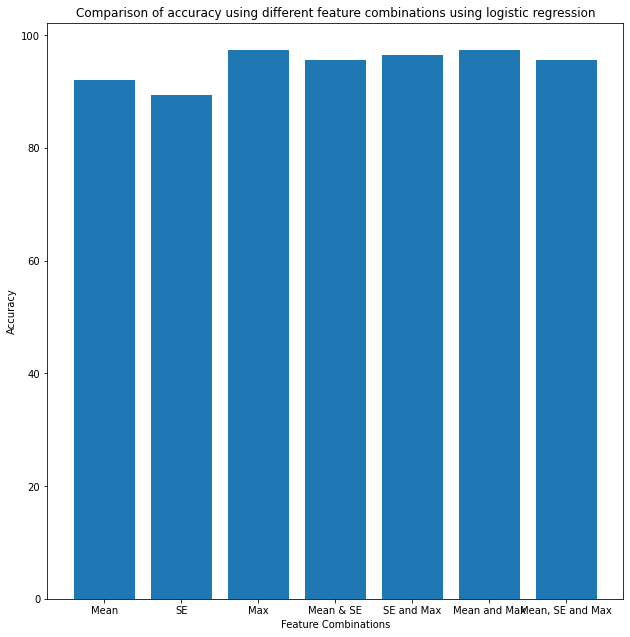

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
feature_comb = ['Mean', 'SE', 'Max', 'Mean & SE', 'SE and Max', 'Mean and Max', 'Mean, SE and Max']
accuracy = [92.11,89.47,97.37,95.61,96.49,97.37,95.61]
ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of accuracy using different feature combinations using logistic regression')
plt.show()